**Table of contents**<a id='toc0_'></a>    
- 1. [Ploting Energy Levels of NV](#toc1_)    
- 2. [Custom Sequence](#toc2_)    
- 3. [Rabi](#toc3_)    
- 4. [Ramsey](#toc4_)    
- 5. [Hahn](#toc5_)    
- 6. [PODMR](#toc6_)    
- 7. [CPMG](#toc7_)    
- 8. [XY](#toc8_)    
- 9. [XY8](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
from qutip import tensor, jmat, qeye, mesolve, fock_dm, parallel_map
import numpy as np
import matplotlib.pyplot as plt

from quaccatoo.QSys import QSys, plot_energy_B0, NV
from quaccatoo.PulsedExp import PulsedExp
from quaccatoo.PulseShapes import square_pulse
from quaccatoo.BasicPulsedExp import Rabi, PODMR, Ramsey, Hahn
from quaccatoo.DDPulsedExp import CPMG, XY, XY8
from quaccatoo.Analysis import Analysis, fit_rabi

# 1. <a id='toc1_'></a>[Ploting Energy Levels of NV](#toc0_)

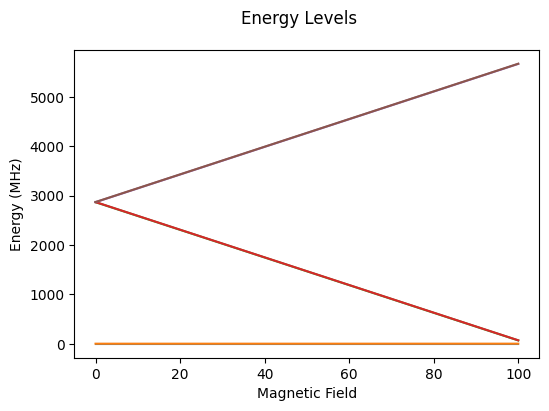

In [2]:
B0 = np.linspace(0, 100, 100)
plot_energy_B0(B0, [NV(N=15, B0 = b).H0 for b in B0])

# 2. <a id='toc2_'></a>[Custom Sequence](#toc0_)

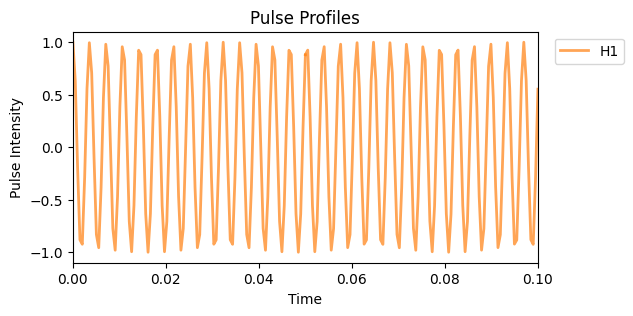

In [2]:
system = NV(N=15, B0=40, theta=1, units_angles='deg')
H1 = 10*system.MW_H1()
pulse_params = {'omega_pulse': system.MW_freqs()[0]}
t_pi = .1/2

my_seq = PulsedExp(system)
my_seq.add_pulse(duration=t_pi, H1=H1, pulse_params=pulse_params)
my_seq.add_pulse(t_pi, H1, pulse_params=pulse_params)
my_seq.measure(system.observable)
my_seq.plot_pulses(figsize=(6, 3))

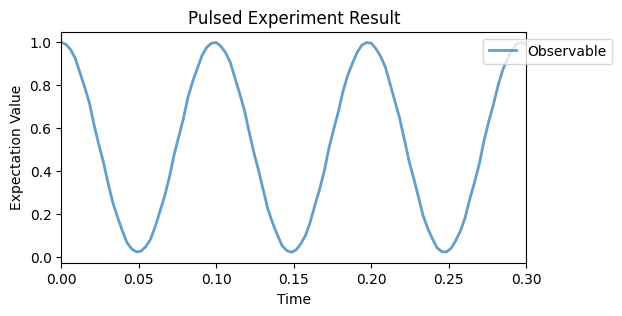

In [4]:
def sequence(tpulse):
    seq = PulsedExp(system)
    seq.add_pulse(tpulse, H1, pulse_params=pulse_params)
    return seq.measure()

tarray = np.linspace(0, 6*t_pi, 100)
my_seq.run(tarray, sequence)
my_seq.plot_results(figsize=(6, 3))

# 3. <a id='toc3_'></a>[Rabi](#toc0_)

In [18]:
system = NV(N=15, B0=40, theta=1, units_angles='deg')
w1 = 30
H1 = w1*system.MW_H1()
pulse_params = {'omega_pulse': system.MW_freqs()[0]}

experiment = Rabi(
    pulse_duration = np.linspace(0, 6*t_pi, 100),
    system=system,
    H1=H1,
    pulse_params=pulse_params
)

experiment.run()

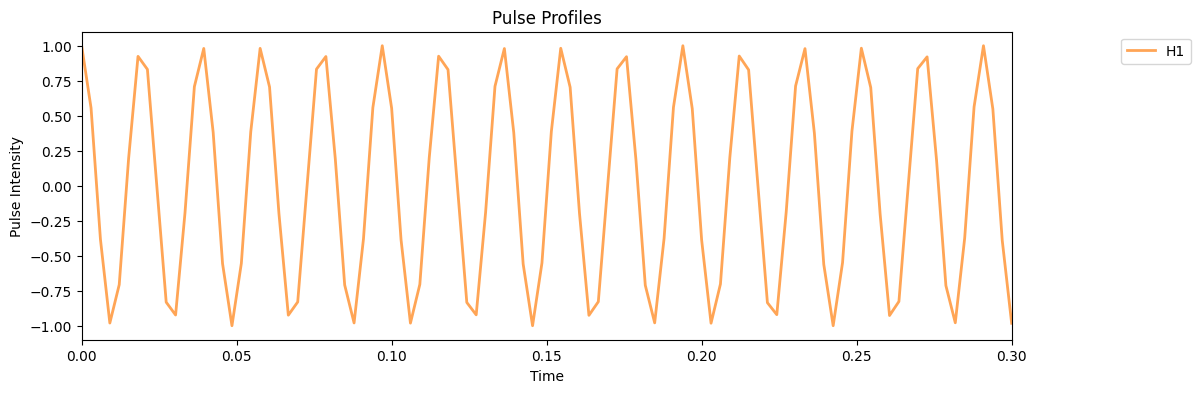

In [6]:
experiment.plot_pulses(figsize=(12, 4))

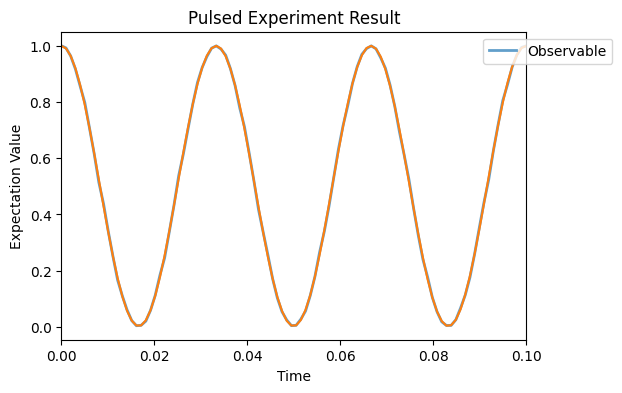

In [20]:
analysis = Analysis(experiment)
analysis.run_fit(fit_function=fit_rabi, guess=[0.5, 1/w1/2, 0.5, 0])
analysis.plot_fit()

In [21]:
analysis.fit

array([4.98457586e-01, 1.66495568e-02, 5.01094821e-01, 4.07463000e-05])

# 4. <a id='toc4_'></a>[Ramsey](#toc0_)

In [8]:
w1 = 10
system = NV(N=15, B0=40)
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = Ramsey(
    system = system,
    free_duration = np.linspace(0, 5, 100),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.run()

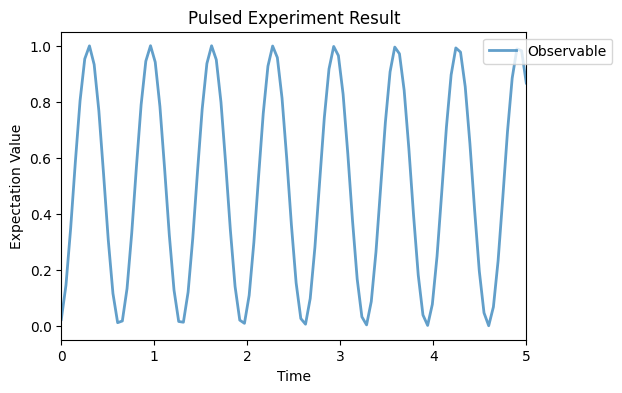

In [9]:
experiment.plot_results(figsize=(6, 4))

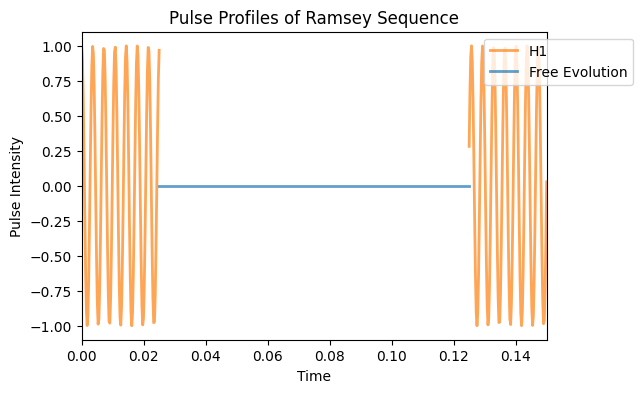

In [10]:
experiment.plot_pulses(tau=.1,figsize=(6, 4))

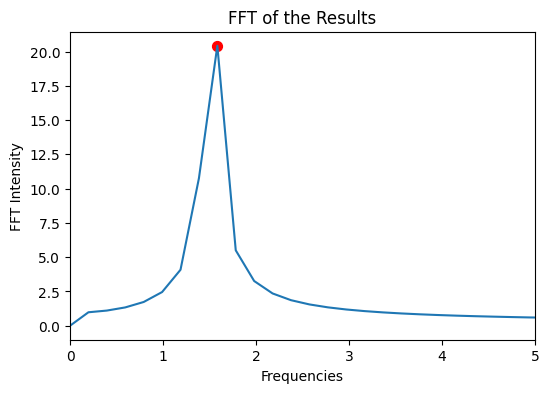

In [18]:
analisys = Analysis(experiment)
analisys.run_FFT()
analisys.get_peaks_FFT(height=1.50)
analisys.plot_FFT(freq_lim=[0,5])

# 5. <a id='toc5_'></a>[Hahn](#toc0_)

In [4]:
w1 = 10
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = Hahn(
    system = system,
    free_duration = np.linspace(0, 10, 100),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.run()

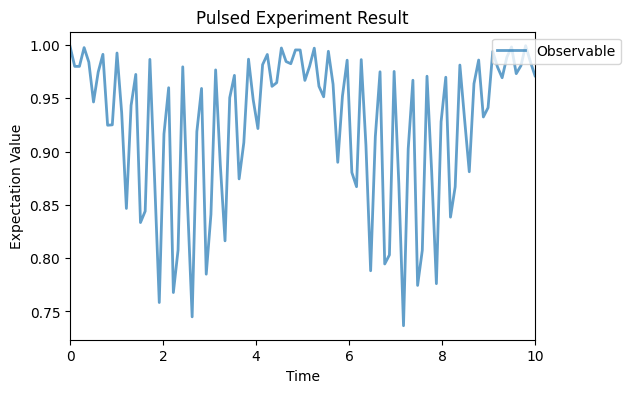

In [5]:
experiment.plot_results(figsize=(6, 4))

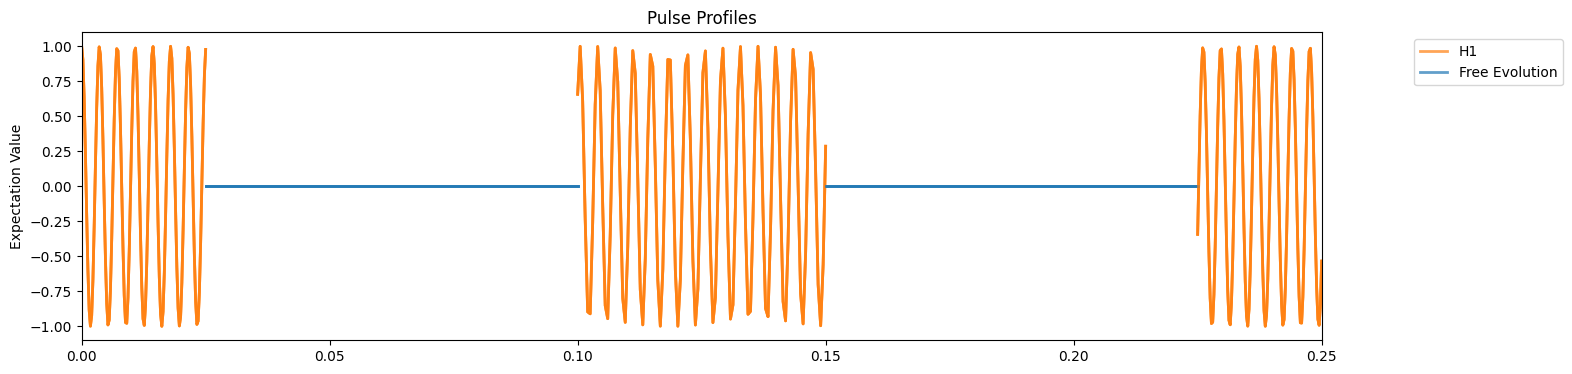

In [11]:
experiment.plot_pulses(tau=.1, figsize=(16, 4))

# 6. <a id='toc6_'></a>[PODMR](#toc0_)

In [2]:
w1 = .1
system = NV(N=15, B0=40, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = .1/w1/2

experiment = PODMR(
    system = system,
    frequencies =  np.linspace(3980, 4000, 100),
    pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
)

# experiment.run()

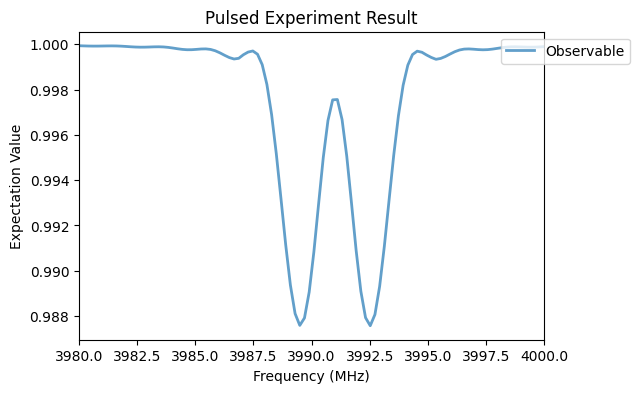

In [6]:
experiment.plot_results(figsize=(6, 4), xlabel='Frequency (MHz)')

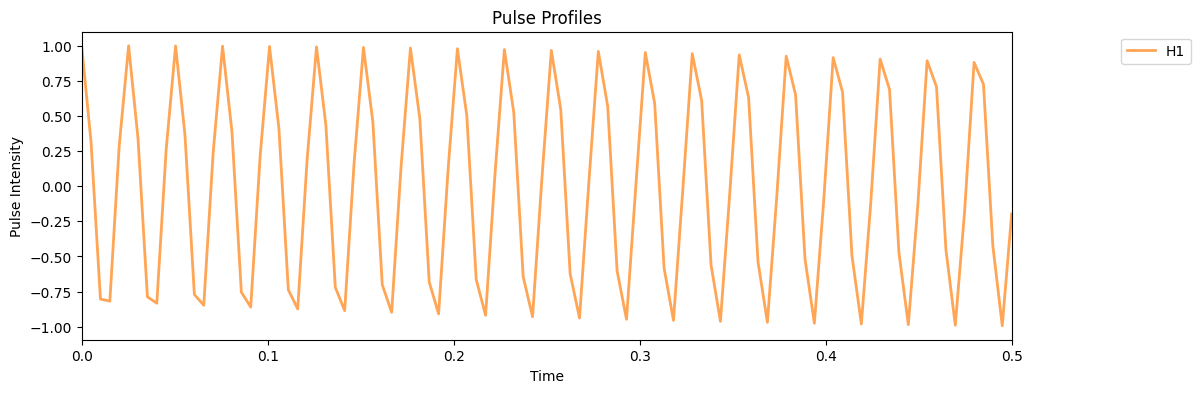

In [3]:
experiment.plot_pulses(figsize=(12, 4))

# 7. <a id='toc7_'></a>[CPMG](#toc0_)

In [6]:
w1 = 30
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = CPMG(
    M = 8,
    system = system,
    free_duration = np.linspace(.1, .8, 40),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6, 'num_cpus': 1},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

In [6]:
def pulse(self, Ht, tarray, options, core_pulse_params, phi_t):
    """
    Updates the total time of the experiment, sets the phase for the pulse and calls the pulse_operation function to perform the pulse operation. This method should be used internally by other methods, as it does not perform any checks on the input parameters for better performance.

    Parameters
    ----------
    Ht (list): list of Hamiltonians for the pulse operation in the form [H0, [H1, pulse_shape]]
    tarray (np.array): time array for the pulse operation
    options (dict): options for the Qutip solver
    pulse_params (dict): dictionary of parameters for the pulse_shape functions
    phi_t (float): time phase of the pulse representing the rotation axis in the rotating frame
    """
    # update the phase of the pulse
    core_pulse_params['phi_t'] += phi_t

    # perform the pulse operation. The time array is multiplied by 2*pi so that [H*t] has units of radians
    experiment.rho = mesolve(Ht, experiment.rho, 2*np.pi*tarray, , [], options = options, args = core_pulse_params).states[-1]

    # update the total time
    experiment.total_time = tarray[-1]

def CPMG_sequence_proj(tau):

    # set the total time to 0
    experiment.total_time = 0
    # initialize the density matrix to the initial density matrix
    experiment.rho = experiment.rho0.copy()

    # perform the first pi/2 pulse
    experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration/2, experiment.time_steps), experiment.options, experiment.pulse_params, 0)

    # repeat M times the pi pulse and free evolution of tau
    for itr_M in range(experiment.M):
        # perform free evolution of tau
        experiment.free_evolution((tau - experiment.pi_pulse_duration)/2)
        # perform pi pulse
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, 0)
        # perform free evolution of tau
        experiment.free_evolution((tau - experiment.pi_pulse_duration)/2)
    
    # perform the last pi/2 pulse
    experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration/2, experiment.time_steps), experiment.options, experiment.pulse_params, 0)

    # if no observable is given, return the final density matrix
    if experiment.observable == None:
        return experiment.rho
    else:
        return np.abs( (experiment.rho * experiment.observable).tr() )

In [4]:
def CPMG_sequence_proj(tau):
    # perform the first pi/2 pulse
    rho = mesolve(experiment.Ht, experiment.rho0, 2*np.pi*np.linspace(0, experiment.pi_pulse_duration/2, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
    # initialize the total time
    t0 = experiment.pi_pulse_duration/2

    # repeat M times the pi pulse and free evolution of tau
    for itr_M in range(experiment.M):
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm()).dag()
        # perform pi pulse
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        # perform free evolution of tau
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm()).dag()
        # adds tau to the total time of the sequence
        t0 += tau

    # perform the last pi/2 pulse
    rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration/2, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]

    return np.abs( (rho * experiment.observable).tr() )

In [15]:
res = parallel_map(CPMG_sequence_proj, experiment.variable)
plt.plot(experiment.variable, res)

TypeError: can only concatenate tuple (not "bool") to tuple

In [7]:
experiment.run()
experiment.plot_results(figsize=(6, 4))

KeyError: "Options dict_keys(['num_cpus']) are not supported"

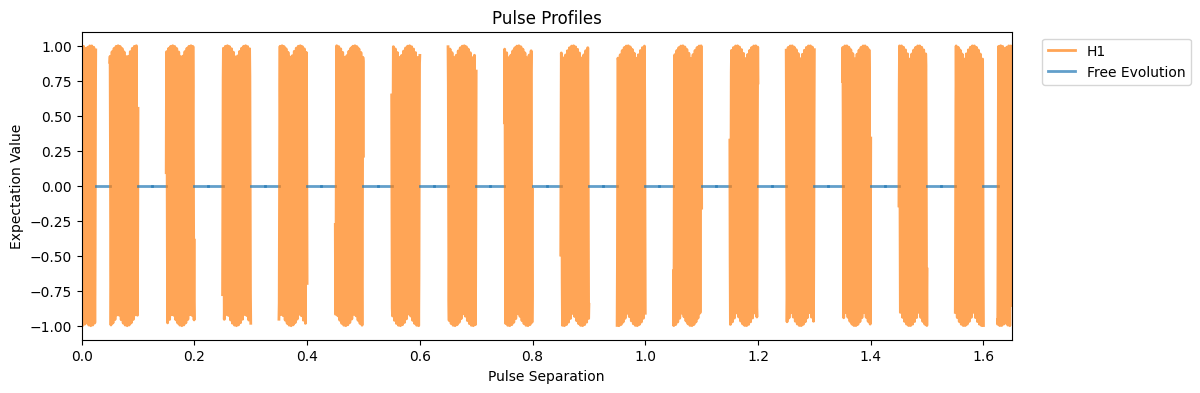

In [14]:
experiment.plot_pulses(tau = .1, figsize=(12, 4))

# 8. <a id='toc8_'></a>[XY](#toc0_)

In [2]:
experiment = XY(
    M = 4,
    free_duration = np.linspace(.2, .6, 100),
    pi_pulse_duration = 1.59007789e-2,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

# experiment.run(
#     observable = NV_observable(15)
# )

NameError: name 'NV_rho0' is not defined

In [2]:
w1 = 10
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = XY(
    M = 4,
    system = system,
    free_duration = np.linspace(0, 1, 100),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.run()

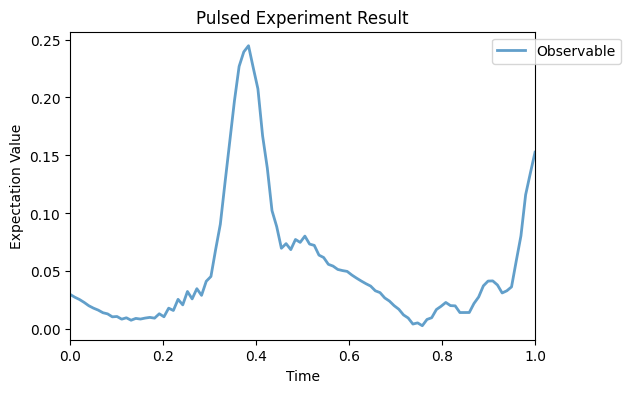

In [3]:
experiment.plot_results(figsize=(6, 4))

In [12]:
experiment.plot_pulses(tau=.1, figsize=(12, 4))

ValueError: tau must be a positive real number larger than pi_pulse_duration/2

# 9. <a id='toc9_'></a>[XY8](#toc0_)

In [12]:
experiment = XY8(
    M = 2,
    free_duration = np.linspace(.2, .6, 100),
    pi_pulse_duration = 1.59007789e-02,
    rho0 = NV_rho0(15),
    H0 = 2*np.pi*NV_H0(B0=400, N=15, units_B0='G', theta=1, phi_r=0, units_H0='MHz', units_angles='deg'),
    H1 = 2*np.pi*NV_H1(w1=2*np.pi*10, N=15),
    pulse_params = {'omega_pulse': 2*np.pi*NV_MW_freqs(B0=400, N=15, theta=1, phi_r=0, units_B0='G', units_freq='MHz')[0]},
)

experiment.run(
    observable = NV_observable(15),
)

In [10]:
def XY8_sequence_proj(tau):
    """
    Define the XY8-M sequence with an initial pi/2 pulse and a final pi/2 pulse in order to project the measurement in the Sz basis. The sequence is to be called by the parallel_map method of QuTip.

    Parameters
    ----------
    tau (float): free evolution time

    Returns
    -------
    rho (Qobj): final density matrix        
    """
    # initialize the total time and state
    experiment.total_time = 0
    experiment.rho = experiment.rho0.copy()

    experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration/2, experiment.time_steps), experiment.options, experiment.pulse_params, 0)

    # repeat M times the pi X pulse, free evolution of tau pi Y pulse and free evolution of tau
    for itr_M in range(experiment.M):
        # perform half free evolution
        experiment.free_evolution((tau - experiment.pi_pulse_duration)/2)
        # perform pi pulse on X axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, 0)
        # perform free evolution of tau
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on Y axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, np.pi/2)
        # perform half free evolution
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on X axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, 0)
        # perform free evolution of tau
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on Y axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, np.pi/2)
        # perform half free evolution
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on X axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, np.pi/2)
        # perform free evolution of tau
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on Y axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, 0)
        # perform half free evolution
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on X axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, np.pi/2)
        # perform free evolution of tau
        experiment.free_evolution(tau - experiment.pi_pulse_duration)
        # perform pi pulse on Y axis
        experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration, experiment.time_steps), experiment.options, experiment.pulse_params, 0)
        # perform free evolution of tau/2
        experiment.free_evolution((tau - experiment.pi_pulse_duration)/2)

    experiment.pulse(experiment.Ht, np.linspace(experiment.total_time, experiment.total_time + experiment.pi_pulse_duration/2, experiment.time_steps), experiment.options, experiment.pulse_params, 0)

    # if no observable is given, return the final density matrix
    if experiment.observable == None:
        return experiment.rho
    else:
        return np.abs( (experiment.rho * experiment.observable).tr() )

In [5]:
def XY8_sequence_proj(tau):
    """
    Define the XY8-M sequence with an initial pi/2 pulse and a final pi/2 pulse in order to project the measurement in the Sz basis. The sequence is to be called by the parallel_map method of QuTip.

    Parameters
    ----------
    tau (float): free evolution time

    Returns
    -------
    rho (Qobj): final density matrix        
    """
    # perform the first pi/2 pulse
    rho = mesolve(experiment.Ht, experiment.rho0, 2*np.pi*np.linspace(0, experiment.pi_pulse_duration/2, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
    # initialize the total time
    t0 = experiment.pi_pulse_duration/2

    # repeat M times the XY8 block
    for itr_M in range(experiment.M):
        # perform half free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm()).dag()
        t0 += (tau - experiment.pi_pulse_duration)/2
        # perform X pi pulse
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        # perform free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform Y pi pulse by adding a phase of pi/2 then removing
        experiment.pulse_params['phi_t'] += np.pi/2
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        experiment.pulse_params['phi_t'] -= np.pi/2
        # perform free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform X pi pulse
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        # perform free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform Y pi pulse by adding a phase of pi/2
        experiment.pulse_params['phi_t'] += np.pi/2
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        # perform free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform Y pi pulse and remove the phase of pi/2
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        experiment.pulse_params['phi_t'] -= np.pi/2
        # perform half free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform X pi pulse
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        # perform free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform Y pi pulse by adding a phase of pi/2 then removing
        experiment.pulse_params['phi_t'] += np.pi/2
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        experiment.pulse_params['phi_t'] -= np.pi/2
        # perform free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)).expm()).dag()
        t0 += tau
        # perform X pi pulse
        rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1]
        # perform half free evolution and add to total time
        rho = (-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm() * rho * ((-1j*2*np.pi*experiment.H0*(tau - experiment.pi_pulse_duration)/2).expm()).dag()
        t0 += (tau + experiment.pi_pulse_duration)/2

    # perform the last pi/2 pulse
    rho = mesolve(experiment.Ht, rho, 2*np.pi*np.linspace(t0, t0 + experiment.pi_pulse_duration/2, experiment.time_steps), experiment.c_ops, [], options = experiment.options, args = experiment.pulse_params).states[-1] 

    return np.abs( (rho * experiment.observable).tr() )

In [2]:
w1 = 30
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = XY8(
    M = 2,
    system = system,
    free_duration = np.linspace(.2, .6, 40),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

In [6]:
res = parallel_map(XY8_sequence_proj, experiment.variable)
# plt.plot(experiment.variable, res)

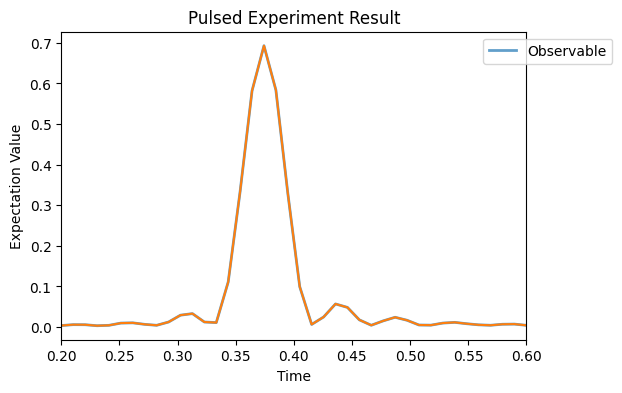

In [7]:
# experiment.run()
experiment.plot_results(figsize=(6, 4))
plt.plot(experiment.variable, res)

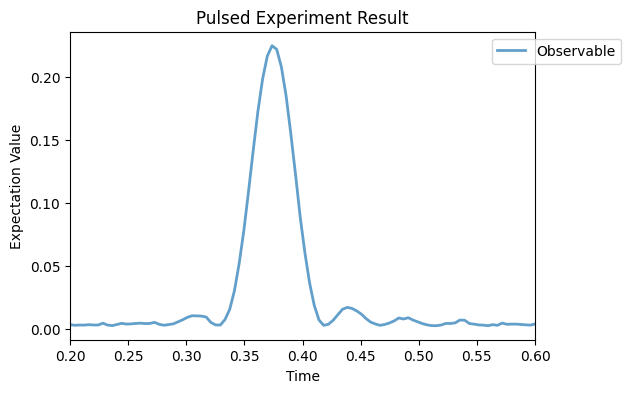

In [13]:
experiment.plot_results(figsize=(6, 4))